In [1]:
from milcapy.model import Model
portico = Model()

In [5]:
# materiales y secciones:

# Parametros:
h = 4
b = 4
l = 4

# Materiales y secciones
hr = 0.5
br = 0.3
E = 2.1e6
v = 0.2
G = E / (2 * (1 + v))
A = hr * br
Jx = hr*br**3*(16/3 - 3.36*br/hr*(1-(br/hr)**4/12))/16
Iy = hr * br**3 / 12
Iz = br * hr**3 / 12
Asy = 5/6 * A
Asz = 5/6 * A


print(f'hr: {hr}, br: {br}, E: {E}, v: {v}, G: {G}, \nA: {A}, Jx: {Jx}, Iy: {Iy}, Iz: {Iz}, Asy: {Asy}, Asz: {Asz}')

hr: 0.5, br: 0.3, E: 2100000.0, v: 0.2, G: 875000.0, 
A: 0.15, Jx: 0.0028173707999999994, Iy: 0.001125, Iz: 0.0031249999999999997, Asy: 0.125, Asz: 0.125


In [6]:
# nodos:
coords = {
    1: (0, 0, 0),
    2: (l, 0, 0),
    3: (l, b, 0),
    4: (0, b, 0),
    5: (0, 0, h),
    6: (l, 0, h),
    7: (l, b, h),
    8: (0, b, h),
}

for i, coord in coords.items():
    portico.add_node(i, *coord)

In [7]:
# tranformaciones:
vec_col = [1, 0, 0]
vec_viga = [0, 0, 1]

portico.def_geom_transf(1, *vec_col)
portico.def_geom_transf(2, *vec_viga)

In [8]:
# miembros:
portico.add_member(1, 1, 5, E, G, A, Jx, Iy, Iz, Asy, Asz, 1)
portico.add_member(2, 2, 6, E, G, A, Jx, Iy, Iz, Asy, Asz, 1)
portico.add_member(3, 3, 7, E, G, A, Jx, Iy, Iz, Asy, Asz, 1)
portico.add_member(4, 4, 8, E, G, A, Jx, Iy, Iz, Asy, Asz, 1)
portico.add_member(5, 5, 6, E, G, A, Jx, Iy, Iz, Asy, Asz, 2)
portico.add_member(6, 6, 7, E, G, A, Jx, Iy, Iz, Asy, Asz, 2)
portico.add_member(7, 7, 8, E, G, A, Jx, Iy, Iz, Asy, Asz, 2)
portico.add_member(8, 8, 5, E, G, A, Jx, Iy, Iz, Asy, Asz, 2)


In [9]:
# restricciones:
fixed = (True, True, True, True, True, True)
for i in [1, 2, 3, 4]:
    portico.add_restraint(i, fixed)

portico.add_point_load(5, fx=100, fy=100, fz=100, mx=100, my=100, mz=100)

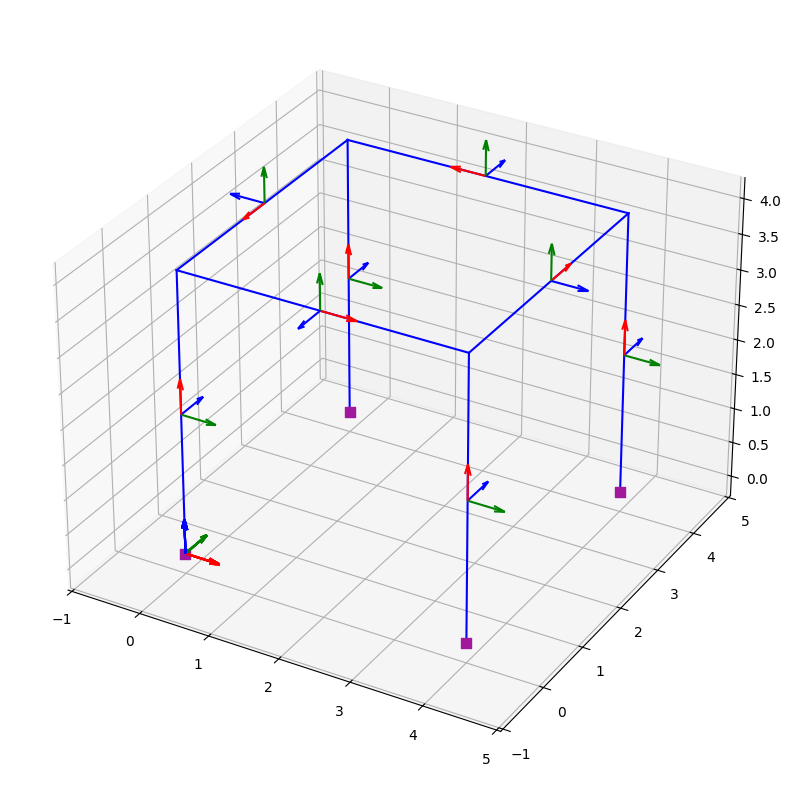

In [10]:
# solucion:
u, r = portico.solve()

portico.show_model()

In [11]:
import pandas as pd
node_disp = pd.DataFrame(portico.nodes[5].displacements)
print(node_disp)

          0
0  0.063096
1  0.001785
2  0.074963
3  0.028482
4  0.016013
5  0.010338
